In [10]:
# Lets take a look at the content of the Iris dataset
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets


iris = datasets.load_iris()

X = iris.data[:, 2:]  # Vælger petal length og petal width
y = iris.target
#print(X)
print(len(X))


150


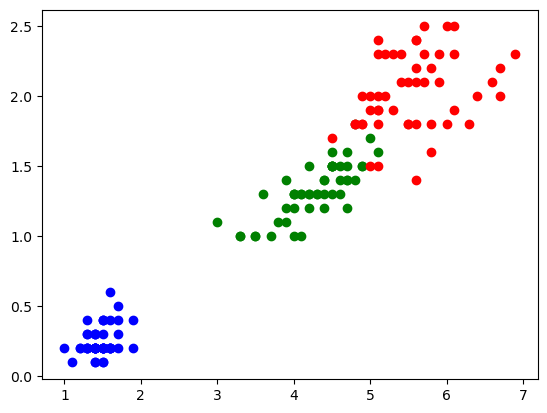

In [8]:
# Lets plot each of the 3 iris types with a different color based on petal length x width
colors = 'bgr'
for idx,name in enumerate(iris.target_names):

    petal_length = iris.data[iris.target == idx][:,2] # get petal length for each flower in the names group
    petal_width = iris.data[iris.target == idx][:,3]

    plt.scatter(petal_length, petal_width, c=colors[idx], label=name)

In [11]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

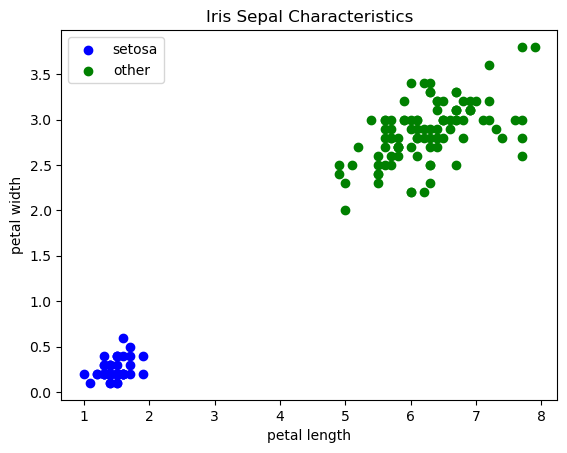

In [13]:
# Divide iris into setosa (target == 0) and not setosa
petal_length = iris.data[iris.target == 0][:,2]
petal_width = iris.data[iris.target == 0][:,3]
plt.scatter(petal_length, petal_width, c='b', label='setosa')

petal_length = iris.data[iris.target != 0][:,0]
petal_width = iris.data[iris.target != 0][:,1]
plt.scatter(petal_length, petal_width, c='g', label='other')

plt.title('Iris Sepal Characteristics')
plt.xlabel('petal length')
plt.ylabel('petal width')

plt.legend()
plt.show()

In [25]:
import numpy as np


y_setosa = np.where(iris.target == 0, 1, -1)  # Setosa får label 1, andre får label -1

training_data = list(zip(X, y_setosa))

print('Trainings data: \n',training_data[:10])

def perceptron(inp_vec, weights):
    return np.sign(np.dot(inp_vec, weights))


Trainings data: 
 [(array([1.4, 0.2]), 1), (array([1.4, 0.2]), 1), (array([1.3, 0.2]), 1), (array([1.5, 0.2]), 1), (array([1.4, 0.2]), 1), (array([1.7, 0.4]), 1), (array([1.4, 0.3]), 1), (array([1.5, 0.2]), 1), (array([1.4, 0.2]), 1), (array([1.5, 0.1]), 1)]


In [38]:
import pdb

def pla(training_data, no_iterations=10000, eta=0.5):
    """
    Find the proper weights to use in the perceptron based on data and target
    Parameters:
    training_data: list of vectors (features), as predictors zipped with a target value
    no_iterations: number of times to adjust the weights to get them as close as possible to the optimal number
    eta: the learning rate (prevent learning to go pendulum from one extreme error to the opposite)
    """
    
    dim = len(training_data[0][0]) # len = 2 (petal width and height)
    weights =  np.random.random(dim) # error and weights (for x and y) start out as random numbers
    
    # initial_error
    error = np.random.random()
    weight_history = [np.copy(weights)]

    for i in range(no_iterations):
        #pdb.set_trace()
        #breakpoint()
        inp_vec, expected_label = training_data[i % len(training_data)] # get the next feature set and label (start over after reaching end)
        perceptron_output = perceptron(inp_vec, weights) # perceptron output id a decimal between 0 and 1
        error = expected_label - perceptron_output       # error 
        weights += eta * error * inp_vec # accumulate the weights
        weight_history.append(np.copy(weights))
        
    return weights, weight_history 
        

learned_weights, weight_history = pla(training_data)
#print(weight_history)
print(learned_weights)
#print('training data',training_data)

[-1.15243077 -1.51991077  3.68155196]


In [35]:
num_correct_predictions = 0
for x, label in training_data:
    prediction = perceptron(x, learned_weights)
    if prediction == label:
        num_correct_predictions += 1

print(f"Antal korrekte forudsigelser: {num_correct_predictions} ud af {len(training_data)}")


Antal korrekte forudsigelser: 131 ud af 150


In [39]:
X_bias = np.hstack((X, np.ones((X.shape[0], 1))))
training_data = list(zip(X_bias, y_setosa))


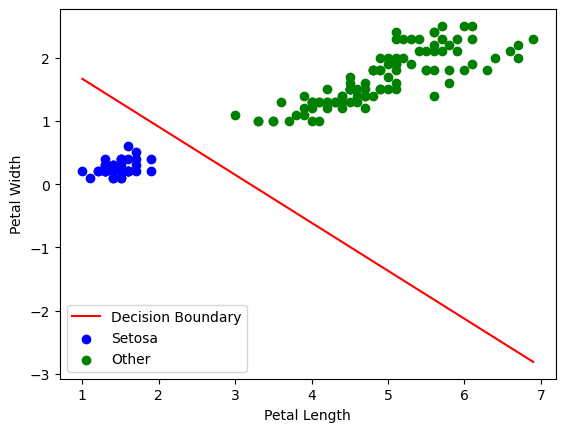

In [43]:
import matplotlib.pyplot as plt

m = -learned_weights[0] / learned_weights[1]
b = -learned_weights[2] / learned_weights[1]

# Plot the decision boundary line
x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_values = m * x_values + b
plt.plot(x_values, y_values, 'r', label='Decision Boundary')

# Plot the data points
plt.scatter(X[iris.target == 0][:, 0], X[iris.target == 0][:, 1], c='b', label='Setosa')
plt.scatter(X[iris.target != 0][:, 0], X[iris.target != 0][:, 1], c='g', label='Other')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

